# ALS Analysis

In [1]:
import pandas as pd
import numpy as np
from lenskit.algorithms.item_knn import ItemItem
%matplotlib inline

## Parameter Sweep

In [2]:
db_url = 'sqlite:///build/sweep-als-ml-10m.sqlite'

In [3]:
runs = pd.read_sql('runs', db_url)
runs.head()

,index,Partition,PredictTime,TrainTime,features,regularization
0,0,0,13.350378,15.826921,5,0.01
1,0,0,13.391721,14.115965,5,0.05
2,0,0,13.623664,14.159285,5,0.10
3,0,0,13.411846,14.972972,10,0.01
4,0,0,13.403215,14.961558,10,0.05


### Training Time

In [8]:
train_time = runs.groupby(['features', 'regularization']).TrainTime.agg(['mean', 'min', 'max'])
train_time.head()

mean        min        max
features regularization                                 
5        0.01            14.521292  14.095455  15.826921
         0.05            14.183951  14.018807  14.348060
         0.10            14.189823  14.087938  14.281993
10       0.01            15.085923  14.972972  15.200739
         0.05            15.071787  14.961558  15.227893

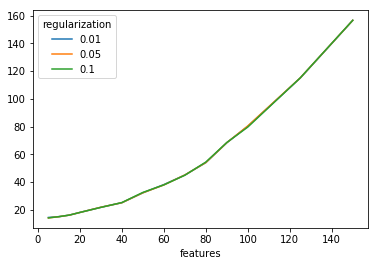

In [14]:
train_time.reset_index().pivot(index='features', columns='regularization', values='mean').plot()

Regularization does not affect training time, but feature count definitely does (as expected).

### Prediction Accuracy

In [4]:
preds = pd.read_sql('predictions', db_url)
preds.head()

,index,user,item,rating,timestamp,prediction,features,regularization
0,321,7,3703,5.0,1049820598,3.887248,5,0.01
1,247,7,593,3.0,1049764435,4.423460,5,0.01
2,291,7,1590,3.0,1050098747,3.044372,5,0.01
3,345,7,5500,3.5,1055038214,3.630372,5,0.01
4,350,7,6273,4.0,1055038104,4.488814,5,0.01


In [5]:
preds['error'] = preds.rating - preds.prediction
preds['sqerr'] = preds.error * preds.error
mse = preds.groupby(['features', 'regularization']).sqerr.mean()
rmse = np.sqrt(mse)
rmse = rmse.reset_index(name='RMSE')
rmse.head()

,features,regularization,RMSE
0,5,0.01,0.875147
1,5,0.05,0.857125
2,5,0.10,0.861759
3,10,0.01,0.894736
4,10,0.05,0.848320


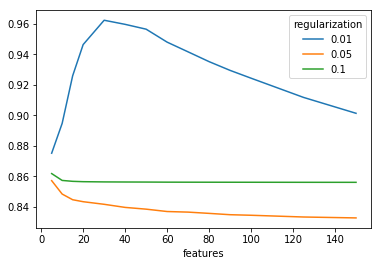

In [6]:
rmse_piv = rmse.pivot(index='features', columns='regularization', values='RMSE')
rmse_piv.plot()

## Training Study

In [ ]:
epochs = pd.read_csv('build/probe-als-ml-10m.csv')

In [ ]:
epochs.plot.scatter(x='epoch', y='rmse')